# Ensemble Methods
Implement random forest and gradient boosted trees on credit card default dataset:

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

In [1]:
import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

## Data

In [2]:
data = pd.read_csv('default_of_credit_card_clients.csv', index_col=0)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data.iloc[:,-1], test_size=0.33, random_state=0)

## Random Forest

Number of trees in the forest

C:\Users\scadams21\AppData\Local\anaconda3\envs\DeloitteAI\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\scadams21\AppData\Local\anaconda3\envs\DeloitteAI\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Text(0.5, 1.0, 'Out-of-Bag Error')

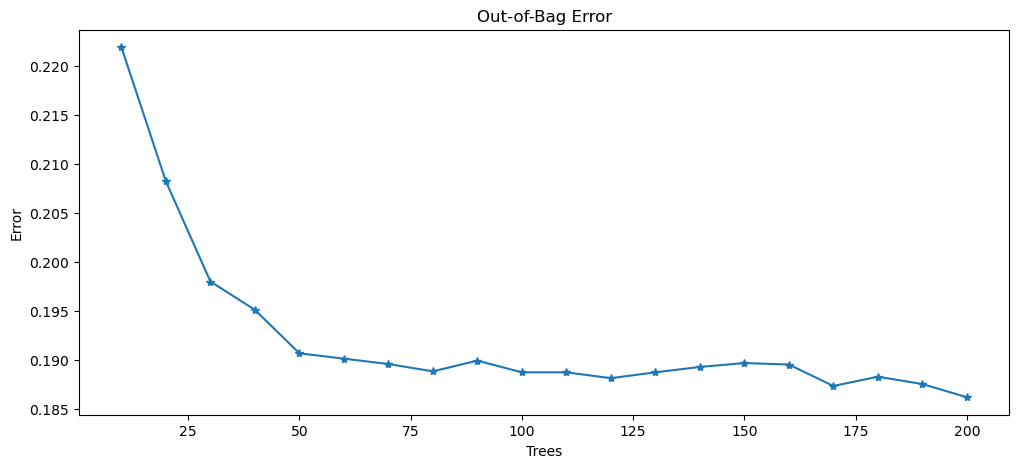

In [4]:
trees = np.linspace(10, 200, 20, dtype=np.int16)

OOB_Score = []
for num_trees in trees:
    rf = RandomForestClassifier(n_estimators=num_trees, warm_start=True, oob_score=True).fit(X_train, y_train)
    OOB_Score.append(1-rf.oob_score_)
    
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(trees, OOB_Score, '-*')
ax.set_xlabel('Trees')
ax.set_ylabel('Error')
ax.set_title('Out-of-Bag Error')

In [5]:
rf = RandomForestClassifier(n_estimators=200).fit(X_train, y_train)

In [6]:
rf_accuracy = accuracy_score(y_test, rf.predict(X_test))
print('Accuracy of Random Forest', rf_accuracy)

Accuracy of Random Forest 0.822929292929293


<Axes: >

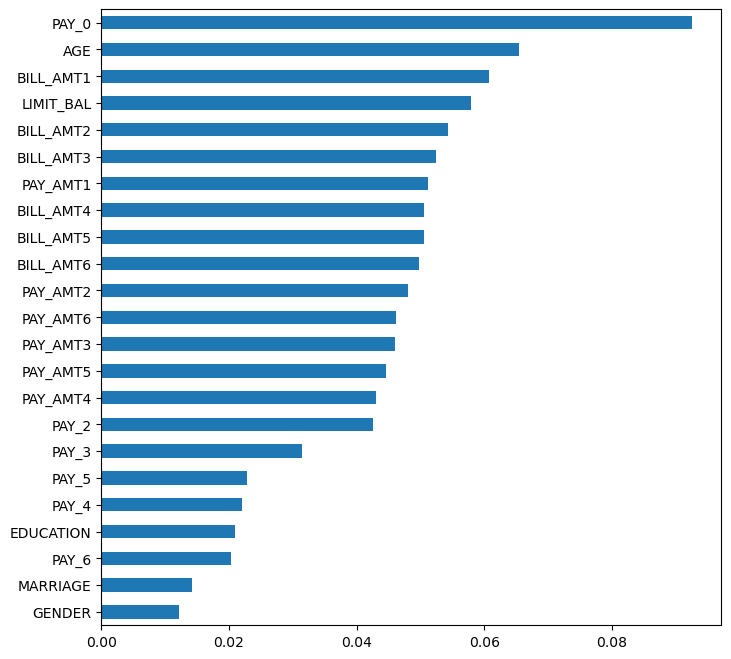

In [7]:
forest_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
fig, ax = plt.subplots(figsize=(8,8))
forest_importances.sort_values().plot.barh(ax=ax)

## Gradient Boosted Trees

Using early stopping to estimate number of boosting iterations

In [8]:
gbt = GradientBoostingClassifier(n_estimators=500,             # number of boosting iterations
                                 validation_fraction=0.2,      # fraction of data used to validate
                                 n_iter_no_change=5,           # iterations without change
                                 tol = 0.0001)                   # tolerance for change in validation score
gbt.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=500, n_iter_no_change=5,
                           validation_fraction=0.2)

In [9]:
print('Number of boosting iterations: ', gbt.n_estimators_)

Number of boosting iterations:  76


Text(0.5, 1.0, 'Training Loss')

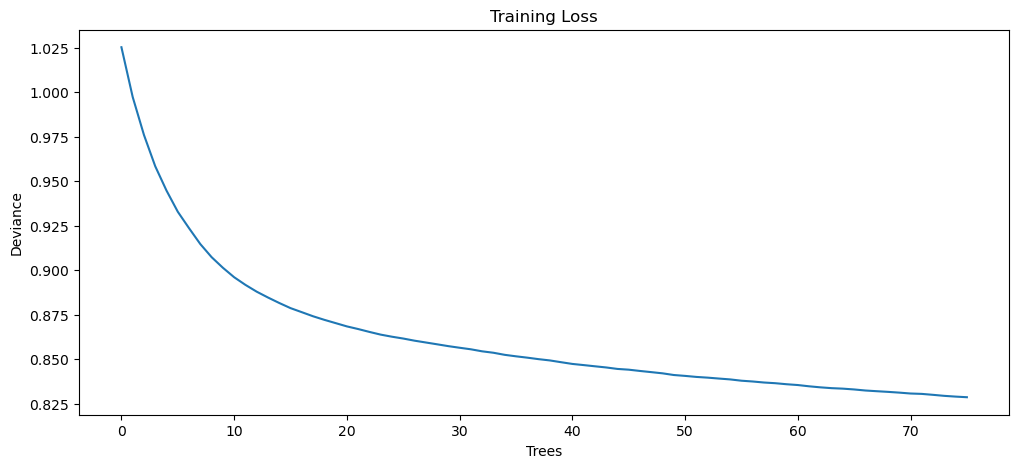

In [10]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(np.arange(gbt.n_estimators_), gbt.train_score_)
ax.set_xlabel('Trees')
ax.set_ylabel('Deviance')
ax.set_title('Training Loss')

Evaluate on test set

In [11]:
gbt_accuracy = accuracy_score(y_test, gbt.predict(X_test))
print('Accuracy of Random Forest', gbt_accuracy)

Accuracy of Random Forest 0.8255555555555556


Feature Importance

<Axes: >

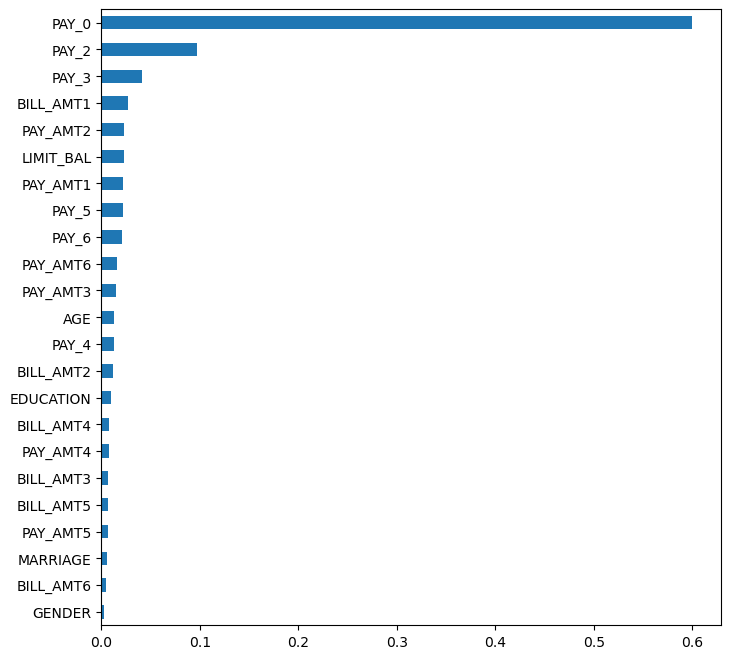

In [12]:
gbt_importances = pd.Series(gbt.feature_importances_, index=X_train.columns)
fig, ax = plt.subplots(figsize=(8,8))
gbt_importances.sort_values().plot.barh(ax=ax)